#### **NAME: Jackline Mboya**
#### **ADM No: 193670**

**Week 5 Assignment**

#### **Unit Code: DSA 8302**
#### **Unit Name: Computational Techniques in Data Science**

## Question 1: Steady-State Probability Calculation
You are given the following 3×3 transition matrix representing the state changes of a system
over time:

𝑷 = [

𝟎. 𝟕 𝟎. 𝟐 𝟎. 𝟏

𝟎. 𝟑 𝟎. 𝟒 𝟎. 𝟑

𝟎. 𝟑 𝟎. 𝟐 𝟎. 𝟓

]

Tasks:
1. Represent the matrix in Python using NumPy.
2. Verify if this matrix is a valid stochastic matrix.
3. Compute the steady-state probabilities analytically using Python.

In [1]:
#Matrix Representation
import numpy as np


In [17]:
# Define the transition matrix P
P = np.array([[0.7, 0.2, 0.1],
              [0.3, 0.4, 0.3],
              [0.3, 0.2, 0.5]])

# Print the matrix
P


array([[0.7, 0.2, 0.1],
       [0.3, 0.4, 0.3],
       [0.3, 0.2, 0.5]])

In [18]:
is_stochastic = np.allclose(P.sum(axis=1), 1)
print("Is matrix stochastic:", is_stochastic)

Is matrix stochastic: True


The matrix is a valid stochastic matrix.

In [19]:
# Solve πP = π, or (P.T - I)π = 0, with the constraint that sum(π) = 1
A = P.T - np.eye(3)
A = np.vstack([A, np.ones(3)])
b = np.array([0, 0, 0, 1])
steady_state = np.linalg.lstsq(A, b, rcond=None)[0]
print("Steady-state probabilities:", steady_state)


Steady-state probabilities: [0.5  0.25 0.25]


The steady-state probabilities of the matrix are 0.5, 0.25, and 0.25.

## Question Two: Markov Chain Simulation and Visualization
Using the same transition matrix P in question One, simulate a Markov chain for 50 time steps starting from state 0.

Tasks:
1. Simulate the Markov chain and record the state at each time step.
2. Count how many times each state was visited.
3. Plot the sequence of visited states over time using matplotlib.
4. Visualize the frequency distribution of states visited using a bar plot.

In [42]:

from collections import Counter

# 1. Simulate the Markov chain and record the state at each time step
np.random.seed(42)  # for reproducibility
n_steps = 50
current_state = 0
states = [current_state]

# Simulate the Markov chain
for _ in range(n_steps - 1):
    current_state = np.random.choice([0, 1, 2], p=P[current_state])
    states.append(current_state)

# 2. Count how many times each state was visited

# Count visits using Counter
visit_counts = Counter(states)

# Print how many times each state was visited
print("State visit counts:")
for state in range(3):
    print(f"State {state}: {visit_counts[state]} times")


State visit counts:
State 0: 36 times
State 1: 4 times
State 2: 10 times


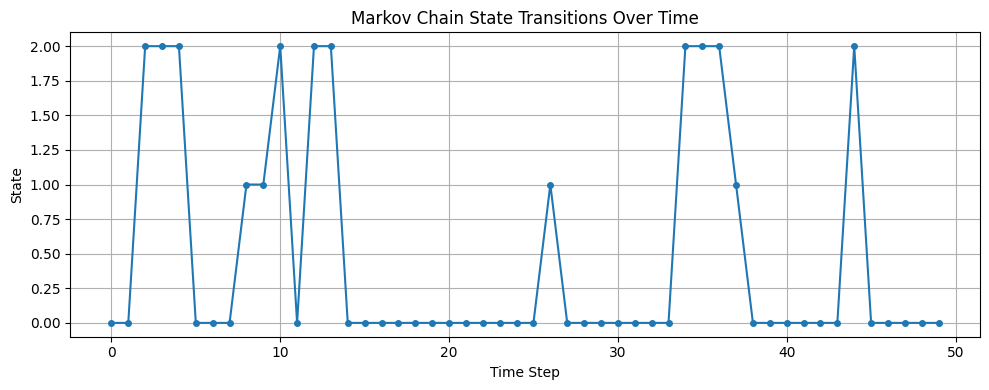

In [43]:
# 3. Plot the sequence of visited states over time using matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(states, marker='o', linestyle='-', markersize=4)
plt.title("Markov Chain State Transitions Over Time")
plt.xlabel("Time Step")
plt.ylabel("State")
plt.grid(True)
plt.tight_layout()
plt.show()


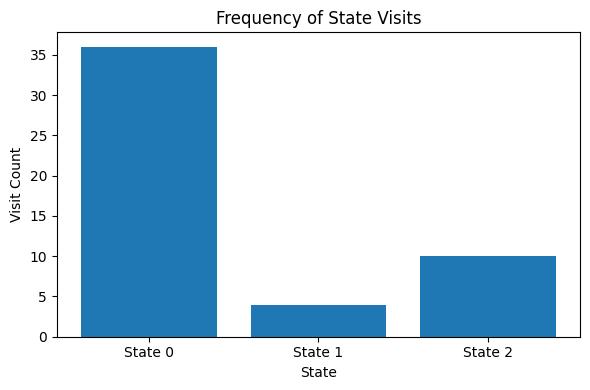

In [44]:
# 4. Visualize the frequency distribution of states visited using a bar plot

plt.figure(figsize=(6, 4))
plt.bar(visit_counts.keys(), visit_counts.values(), tick_label=[f"State {s}" for s in visit_counts.keys()])
plt.title("Frequency of State Visits")
plt.xlabel("State")
plt.ylabel("Visit Count")
plt.tight_layout()
plt.show()

## Question Three: Network Visualization of State Transitions
Using the transition matrix matrix P in question One again, create a directed graph of the Markov chain.

Tasks:
1. Use networkx to create a directed graph where:

  - Nodes represent the states (0, 1, 2).

  - Edges represent transitions with weights corresponding to transition probabilities.
2. Draw the graph using matplotlib.
3. Use edge thickness or labels to indicate the strength of the transition probabilities

In [54]:
import networkx as nx

# 1. Use networkx to create a directed graph
G = nx.DiGraph()

# Add nodes and edges with weights
for i in range(3):
    for j in range(3):
        prob = P[i][j]
        if prob > 0:
            G.add_edge(i, j, weight=prob)

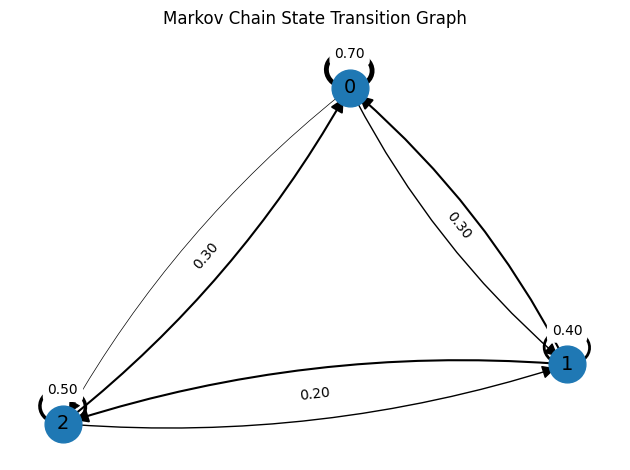

In [56]:
# Node spacing
pos = nx.spring_layout(G, seed=42)

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=14)

# Draw edges with arrows and scaled width
weights = [G[u][v]['weight'] * 5 for u, v in G.edges()]
nx.draw_networkx_edges(
    G, pos, edgelist=G.edges(),
    width=weights,
    arrowstyle='-|>',
    arrowsize=20,
    connectionstyle='arc3,rad=0.1'
)

# Draw edge labels with transition probabilities
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Plot
plt.title("Markov Chain State Transition Graph")
plt.axis('off')
plt.tight_layout()
plt.show()